# SVM
It can be a classifier which can be either linear or non-linear. It trains data using the hinge loss and L2 regulatization.

## Definitions
**Hinge loss vs Logistic loss**  
From the graph below, we can see the "flat" part of the hinge loss, which occues when the raw model output is greater than 1. It means that it predicts a sample correctly beyond some margin of error. A training sample in this "zero loss" region does not make any change for model fitting. This is the key property of SVM.


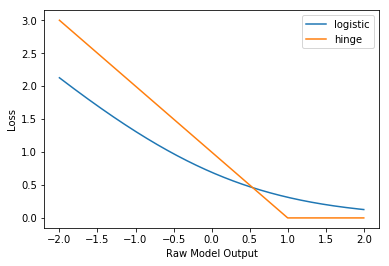

In [13]:
import numpy as np
import matplotlib.pyplot as plt
# Mathematical functions for logistic and hinge losses when y=1
def log_loss(raw_model_output):
    # another way: return np.log(1+np.exp(-raw_model_output))
    h = 1 / (1+np.exp(-raw_model_output))
    return -np.log(h)
def hinge_loss(raw_model_output):
     return np.maximum(0,1-raw_model_output)

# Create a grid of values and plot
grid = np.linspace(-2,2,1000)
plt.plot(grid, log_loss(grid), label='logistic')
plt.plot(grid, hinge_loss(grid), label='hinge')
plt.legend()
plt.xlabel("Raw Model Output")
plt.ylabel("Loss")
plt.show()

**Support Vector**  
A training example not in the flat part of the loss diagram belongs to support vector which means that it is incorrectly classified or close to the boundary.

**Question**: How close is considered close enough to be classified as support vector?  
**Answer**: It is controlled by the regularization strength.

Just as it is said before, a training sample in this "zero loss" region does not make any change for model fitting. So the speed of the model only scales with the number of support vectors, rather than the total number of training examples. Having a small number of support vectors make kernel SVMS really fast. 


In [14]:
import sklearn.datasets
from sklearn.svm import LinearSVC, SVC
from sklearn.model_selection import train_test_split

In [15]:
wine = sklearn.datasets.load_wine()
svm = LinearSVC()
X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

/home/sergio212/.local/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.8666666666666667

Support vectors are defined as training examples that influence the decision boundary. The code below shows this behavior by removing non support vectors from the training set.

In [16]:
def plot_contours(ax, clf, xx, yy, proba=False, **params):
      """Plot the decision boundaries for a classifier.
  
      Parameters
      ----------
      ax: matplotlib axes object
      clf: a classifier
      xx: meshgrid ndarray
      yy: meshgrid ndarray
      params: dictionary of params to pass to contourf, optional
      """
      if proba:
          Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,-1]
          Z = Z.reshape(xx.shape)
          out = ax.imshow(Z,extent=(np.min(xx), np.max(xx), np.min(yy), np.max(yy)), origin='lower', vmin=0, vmax=1, **params)
          ax.contour(xx, yy, Z, levels=[0.5])
      else:
          Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
          Z = Z.reshape(xx.shape)
          out = ax.contourf(xx, yy, Z, **params)
      return out
def make_meshgrid(x, y, h=.02, lims=None):
      """Create a mesh of points to plot in
      Parameters
      ----------
      x: data to base x-axis meshgrid on
      y: data to base y-axis meshgrid on
      h: stepsize for meshgrid, optional
  
      Returns
      -------
      xx, yy : ndarray
      """
  
      if lims is None:
          x_min, x_max = x.min() - 1, x.max() + 1
          y_min, y_max = y.min() - 1, y.max() + 1
      else:
          x_min, x_max, y_min, y_max = lims
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           np.arange(y_min, y_max, h))
      return xx, yy
    
def plot_classifier(X, y, clf, ax=None, ticks=False, proba=False, lims=None): # assumes classifier "clf" is already fit
      X0, X1 = X[:, 0], X[:, 1]
      xx, yy = make_meshgrid(X0, X1, lims=lims)
  
      if ax is None:
          plt.figure()
          ax = plt.gca()
          show = True
      else:
          show = False
  
      # can abstract some of this into a higher-level function for learners to call
      cs = plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8, proba=proba)
      if proba:
          cbar = plt.colorbar(cs)
          cbar.ax.set_ylabel('probability of red $\\Delta$ class', fontsize=20, rotation=270, labelpad=30)
          cbar.ax.tick_params(labelsize=14)
      #ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=30, edgecolors='k', linewidth=1)
      labels = np.unique(y)
      if len(labels) == 2:
          ax.scatter(X0[y==labels[0]], X1[y==labels[0]], cmap=plt.cm.coolwarm, s=60, c='b', marker='o', edgecolors='k')
          ax.scatter(X0[y==labels[1]], X1[y==labels[1]], cmap=plt.cm.coolwarm, s=60, c='r', marker='^', edgecolors='k')
      else:
          ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=50, edgecolors='k', linewidth=1)
  
      ax.set_xlim(xx.min(), xx.max())
      ax.set_ylim(yy.min(), yy.max())
  #     ax.set_xlabel(data.feature_names[0])
  #     ax.set_ylabel(data.feature_names[1])
      if ticks:
          ax.set_xticks(())
          ax.set_yticks(())
  #     ax.set_title(title)
      if show:
          plt.show()
      else:
          return ax
 

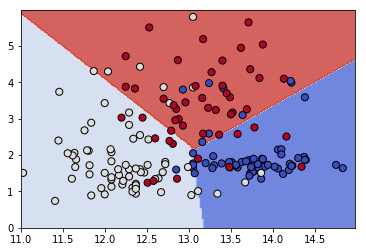

Number of original examples 178
Number of support vectors 81


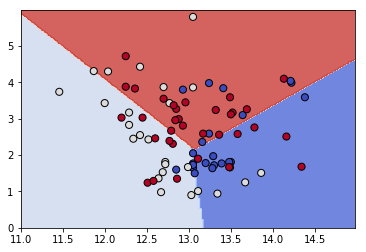

In [17]:
# Train a linear SVM
svm = SVC(kernel="linear")
X = X[:,[0,1]]
svm.fit(X, y)
plot_classifier(X, y, svm, lims=(11,15,0,6))

# Make a new data set keeping only the support vectors
print("Number of original examples", len(X))
print("Number of support vectors", len(svm.support_))
X_small = X[svm.support_]
y_small = y[svm.support_]

# Train a new SVM using only the support vectors
svm_small = SVC(kernel="linear")
svm_small.fit(X_small, y_small)
plot_classifier(X_small, y_small, svm_small, lims=(11,15,0,6))

For non-linear relationship, fitting a linear model in a transformed space corresponds to fitting a non-linear model in the original space. Kernals and kernals SVMs implement feature transformations in a computationally efficient way.

The default kernal for `SVC()` in `sklearn` is RBF(radial basic function).

In [18]:
from sklearn.svm import SVC
svm = SVC(gamma=1) 

We can control the shape of the boundary using the hyperparameters, like `C` to control regularization. Also, the RBF kernal introduces a new hyperparameter `gamma` to control the smoothness of the boundary. By decreasing `gamma`, the boundary will look smoother. On contrary, the large value of `gamma` increases the training accuracy but tends to cause overfitting.  Cross-validation can help us find the better one rather than the large one.

In [26]:
from sklearn.model_selection import GridSearchCV
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters
print("Best CV params", searcher.best_params_)

Best CV params {'gamma': 1e-05}


/home/sergio212/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/sergio212/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Now we will search for the best combination of C and gamma using GridSearchCV.

In [28]:
# Instantiate an RBF SVM
svm = SVC()

# Instantiate the GridSearchCV object and run the search
parameters = {'C':[0.1, 1, 10], 'gamma':[0.00001, 0.0001, 0.001, 0.01, 0.1]}
searcher = GridSearchCV(svm, parameters)
searcher.fit(X_train, y_train)

# Report the best parameters and the corresponding score
print("Best CV params", searcher.best_params_)
print("Best CV accuracy", searcher.best_score_)

# Report the test accuracy using these best parameters
print("Test accuracy of best grid search hypers:", searcher.score(X_test, y_test))

Best CV params {'C': 10, 'gamma': 0.0001}
Best CV accuracy 0.8120300751879699
Test accuracy of best grid search hypers: 0.6


/home/sergio212/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/home/sergio212/.local/lib/python3.6/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


This time, the best value of gamma, 0.0001, is different from the value of 0.001 that we got in the previous exercise, when we fixed C=1. Hyperparameters can affect each other! 